In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import proplot as pplt
from ipywidgets import interact
from ipywidgets import widgets
from tqdm.notebook import tqdm

In [2]:
pplt.rc["cmap.discrete"] = False
pplt.rc["cmap.sequential"] = "viridis"
pplt.rc["figure.facecolor"] = "white"
pplt.rc["grid"] = False

In [9]:
timestamp = 240216180118
data_dir = f"../data_output/{timestamp}/"
data_dir

'../data_output/240216180118/'

In [10]:
filenames = os.listdir(data_dir)
filenames = [f for f in filenames if f.startswith("bunch")]
filenames = [os.path.join(data_dir, f) for f in filenames]
filenames = sorted(filenames)
filenames[:10]

['../data_output/240216180118/bunch_0000.dat',
 '../data_output/240216180118/bunch_0001.dat',
 '../data_output/240216180118/bunch_0002.dat',
 '../data_output/240216180118/bunch_0003.dat',
 '../data_output/240216180118/bunch_0004.dat',
 '../data_output/240216180118/bunch_0005.dat',
 '../data_output/240216180118/bunch_0006.dat',
 '../data_output/240216180118/bunch_0007.dat',
 '../data_output/240216180118/bunch_0008.dat',
 '../data_output/240216180118/bunch_0009.dat']

In [42]:
bunches = []
for filename in tqdm(filenames):
    X = np.loadtxt(filename, comments="%", usecols=range(6))
    X[:, 5] *= 1000.0
    bunches.append(X)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [43]:
@interact(
    turn=widgets.IntSlider(min=0, max=(len(bunches) - 1), value=0), 
    bins=widgets.IntSlider(min=10, max=100, value=32),
)
def update(turn, bins, scatter=False):
    axis = (4, 5)
    X = bunches[turn][:, axis]
    
    limits = ((-125.0, 125.0), (-20.0, 20.0))
    
    fig, ax = pplt.subplots()
    if scatter:
        ax.scatter(X[:, 0], X[:, 1], s=2, color="black")
    else:
        ax.hist2d(X[:, 0], X[:, 1], bins=bins, range=limits)
    ax.format(xlim=limits[0], ylim=limits[1])
    
    pax = ax.panel_axes("t")
    pax.format(xspineloc="bottom")
    pax.hist(X[:, 0], bins=bins, range=limits[0], color="black", histtype="step", lw=1.5)

    pax = ax.panel_axes("r")
    pax.format(yspineloc="left", xspineloc="bottom")
    pax.histh(X[:, 1], bins=bins, range=limits[1], color="black", histtype="step", lw=1.5)

    plt.show()

interactive(children=(IntSlider(value=0, description='turn', max=999), IntSlider(value=32, description='bins',…

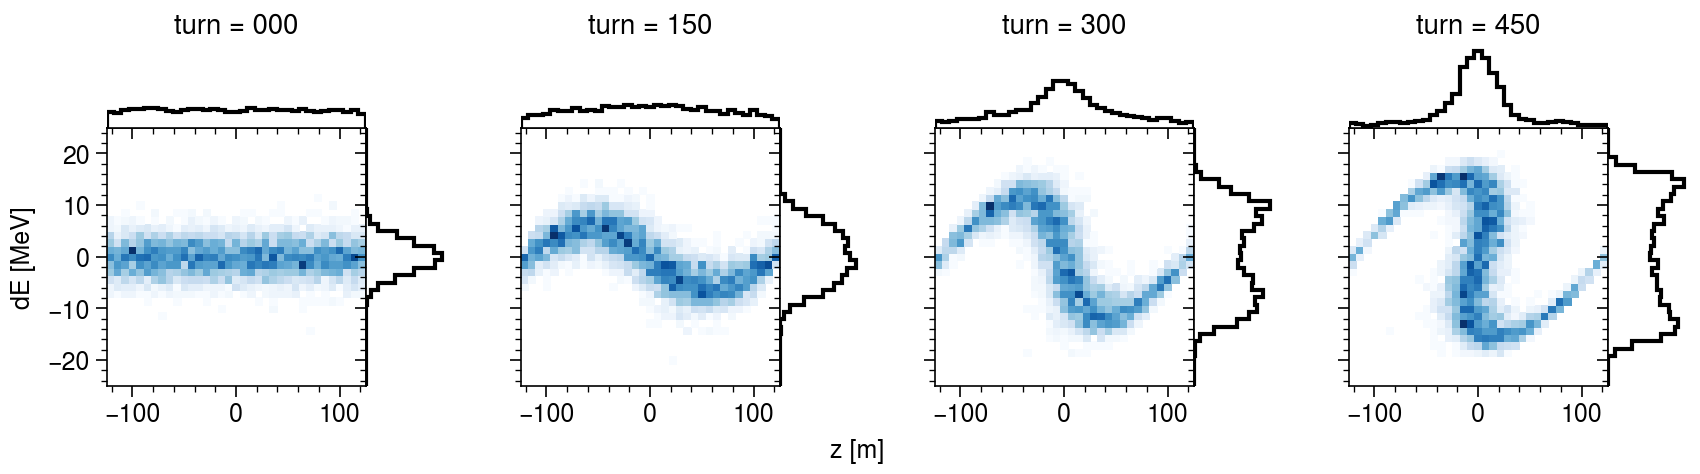

In [86]:
turns = [0, 150, 300, 450]
limits = ((-125.0, 125.0), (-25.0, 25.0))
bins = 35
    
ncols = len(turns)
fig, axs = pplt.subplots(ncols=ncols, figwidth=8.5, space=3.0)
for i, ax in enumerate(axs):
    turn = turns[i]
    X = bunches[turn]
    hist, edges = np.histogramdd(X[:, 4:], bins=(bins, bins), range=limits)
    hist = np.ma.masked_less_equal(hist, 0.0)
    ax.pcolormesh(edges[0], edges[1], hist.T, cmap="blues")
    ax.format(xlim=limits[0], ylim=limits[1], xlabel="z [m]", ylabel="dE [MeV]")
    ax.format(title=f"turn = {turn:03.0f}")
    
    pax = ax.panel_axes("t", space=0, width=0.4)
    pax.format(xspineloc="bottom", yspineloc="neither")
    pax.hist(X[:, 4], bins=bins, range=limits[0], density=True, color="black", histtype="step", lw=1.5)

    pax = ax.panel_axes("r", space=0, width=0.4)
    pax.format(xspineloc="neither", yspineloc="left")
    pax.histh(X[:, 5], bins=bins, range=limits[1], density=True, color="black", histtype="step", lw=1.5)

plt.savefig("./test.png", dpi=300)

In [ ]:


axis = (4, 5)
X = bunches[turn][:, axis]

limits = ((-125.0, 125.0), (-0.02, 0.02))

fig, ax = pplt.subplots()
if scatter:
    ax.scatter(X[:, 0], X[:, 1], s=2, color="black")
else:
    ax.hist2d(X[:, 0], X[:, 1], bins=bins, range=limits)
ax.format(xlim=limits[0], ylim=limits[1])

pax = ax.panel_axes("t")
pax.format(xspineloc="bottom")
pax.hist(X[:, 0], bins=bins, range=limits[0], color="black", histtype="step", lw=1.5)

pax = ax.panel_axes("r")
pax.format(yspineloc="left", xspineloc="bottom")
pax.histh(X[:, 1], bins=bins, range=limits[1], color="black", histtype="step", lw=1.5)

plt.show()